Show correlation matrix of main values "Living area", "PricePr",  "Bedrooms"

<AxesSubplot: >

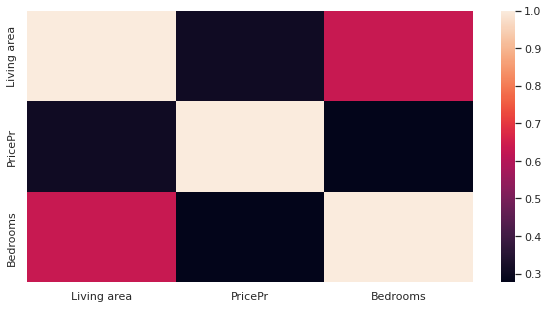

In [334]:
import pandas as pd
import numpy as np
with open('/home/becode/Downloads/page_4.csv') as f:
    us= pd.read_csv('/home/becode/Downloads/page_4.csv', index_col='ID')
#us.reset_index(inplace=True)
us.dropna(subset = ["PricePr", "Living area", "Locality", "Bedrooms"], axis=0, inplace = True)
df6 = us[["Living area", "PricePr", "Locality", "Bedrooms"]]

import seaborn as sns
corr = df6.corr(numeric_only=True)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


Boxplot for Living Area < 250 and Living Area > 90 square meters

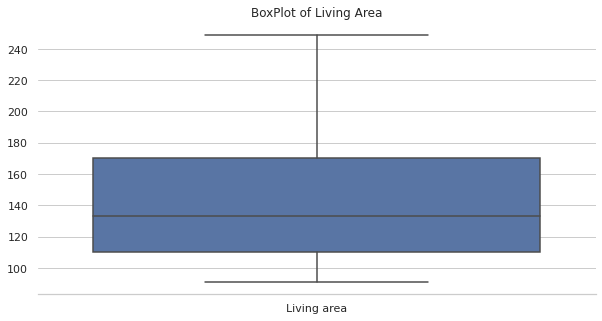

In [335]:
us['Bedrooms'] = pd.to_numeric(us['Bedrooms'])
us['PricePr'] = pd.to_numeric(us['PricePr'], errors='coerce')
us.dropna(subset = ["PricePr", "Living area", "Locality", "Bedrooms"], axis=0, inplace = True)
us.rename(columns={"PricePr": "Price"}, errors="raise", inplace=True)
frame = us.sort_values(by=["Price", "Living area"], ascending=False)
df2 = frame[["Living area"]]
df3 = df2[(df2['Living area'] < 250.0) & (df2['Living area'] > 90.0)] 
df3.reset_index(drop=True,inplace=True)
sns.set_style("whitegrid")
sns.boxplot(data=df3, palette="deep").set(title='BoxPlot of Living Area')
sns.despine(left=True)

Boxplot for Bedrooms, outliers are trimmed

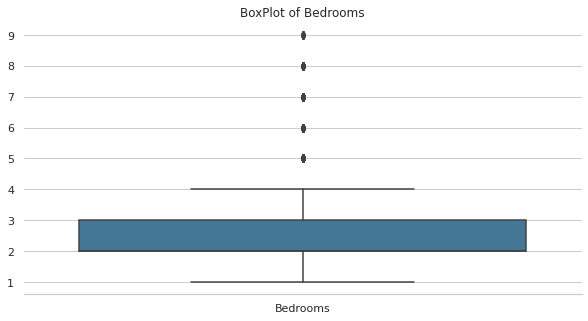

In [336]:
df5 = frame[["Bedrooms"]]
df5 = df5[df5['Bedrooms'] < 10.0] 
sns.set_style("whitegrid")
sns.boxplot(data=df5, palette = "mako").set(title='BoxPlot of Bedrooms')
sns.despine(left=True)

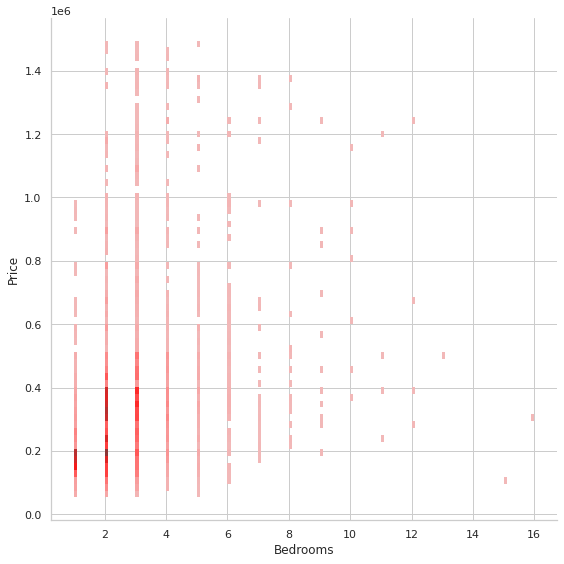

In [337]:
frame2 = us[(us['Price'] < 1500000) & (us['Price'] > 50000)] 
frame3 = frame2[["Price", "Living area", "Locality", "Bedrooms"]]
sns.displot(data = frame3, x= 'Bedrooms', y = 'Price', legend=True, color='red', height=8)
sns.set(style="darkgrid")

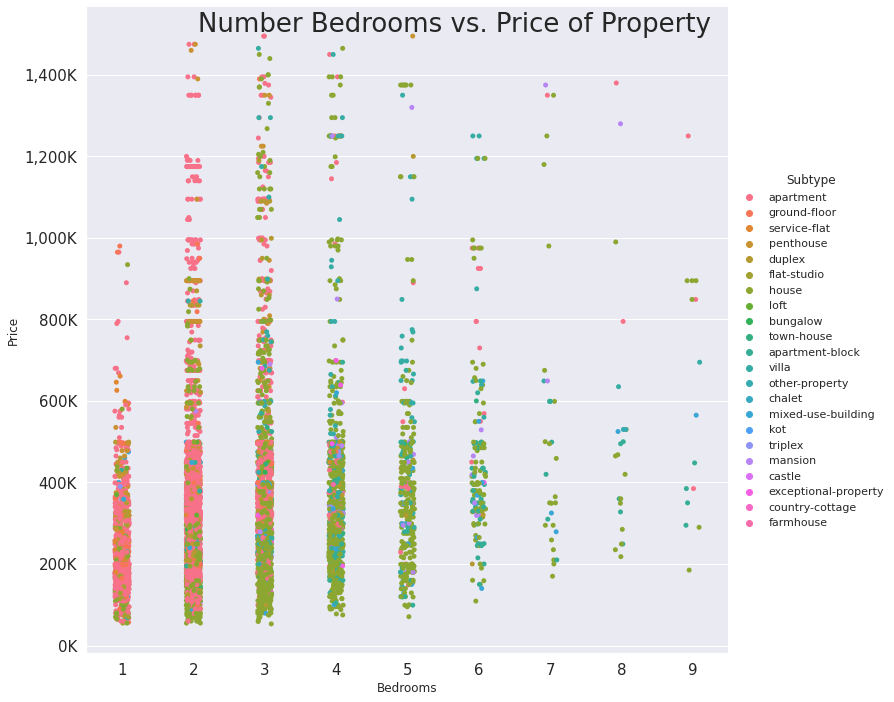

In [338]:
from matplotlib.ticker import FuncFormatter
us["Bedrooms"] = us["Bedrooms"].astype(int)
frame2 = us[(us['Price'] < 1500000) & (us['Price'] > 50000)& (us['Bedrooms'] < 10)] 
frame3 = frame2[["Price", "Living area", "Locality", "Bedrooms", "Subtype"]]
g = sns.catplot(data = frame3, x= 'Bedrooms', y = 'Price',  hue="Subtype", height=10, margin_titles=True)
#g.set(xlabel="Number of Bedrooms", ylabel="Price in 1000€")
g.fig.suptitle('Number Bedrooms vs. Price of Property',fontsize=26, y=0.96)
g.tick_params(labelsize=15)
#g.fig.tight_layout()
#g.set_titles(row_template="{row_name} class")
for ax in g.axes.flat:
    f = lambda x, pos: f'{x/10**3:,.0f}K'
    ax.yaxis.set_major_formatter(FuncFormatter(f))  
    #ax.yaxis.set_major_formatter('€{x:.0f}')

<ipython-input-339-6846d7f84dec>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


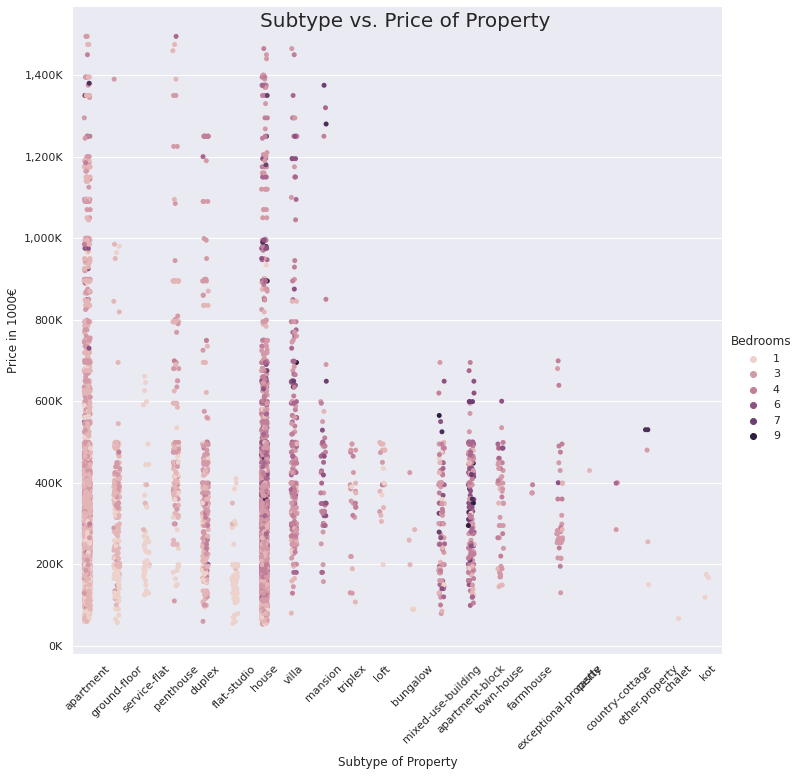

In [339]:
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
us["Bedrooms"] = us["Bedrooms"].astype(int)
frame2 = us[(us['Price'] < 1500000) & (us['Price'] > 50000)& (us['Bedrooms'] < 10)] 
frame3 = frame2[["Price", "Living area", "Locality", "Bedrooms", "Subtype"]]
g = sns.catplot(data = frame3, x= 'Subtype', y = 'Price',  hue="Bedrooms", height=10, margin_titles=True)
g.set(xlabel="Subtype of Property", ylabel="Price in 1000€")
g.fig.suptitle('Subtype vs. Price of Property', fontsize=20, y=0.96)
sns.color_palette()
g.set_titles(row_template="{row_name} class")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    f = lambda x, pos: f'{x/10**3:,.0f}K'
    ax.yaxis.set_major_formatter(FuncFormatter(f))

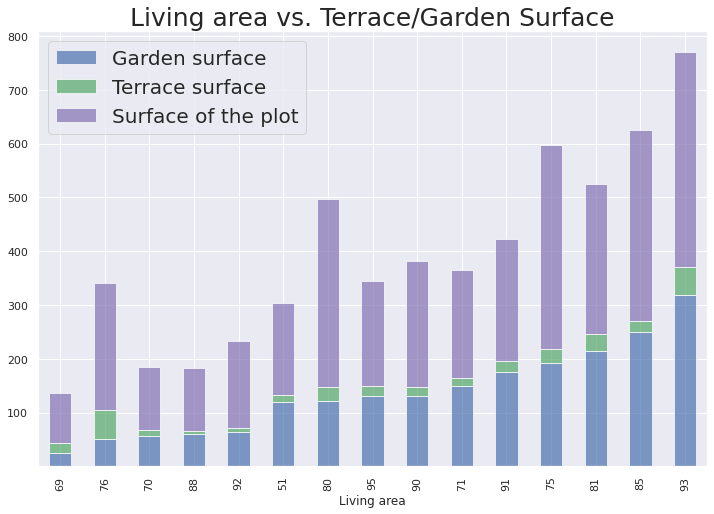

In [340]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
fr1 = us.copy()
fr1.dropna(subset = ["Price", "Living area", "Locality", "Bedrooms", "Subtype", 'Surface of the plot', 'Garden surface', 'Terrace surface' ], axis=0, inplace = True)
fr1['Land Surface'] = fr1['Surface of the plot']-(fr1['Garden surface']+fr1['Terrace surface'])
fr1['Living area'] = fr1['Living area'].astype(int)
frame8 = fr1.groupby('Living area')[['Garden surface', 'Terrace surface', 'Surface of the plot']].mean().head(15).sort_values(by='Garden surface')

gr2 = frame8.plot.bar(stacked=True, color=['b', 'g', 'm'], alpha =0.7)
gr2.axes.yaxis.get_major_ticks()[0].label1.set_visible(False)
gr2.legend( fontsize=20)
gr2.set_title('Living area vs. Terrace/Garden Surface', fontdict=dict(size=25))
gr2.figure.set_size_inches(12,8)
plt.show()